# This tutorial provides examples of codes for static Manhattan and QQ plots. 



In [1]:
# In order to view the figures in this notebook it is necessary to included the following line
%matplotlib inline

In [2]:
# import pandas and qmplot functions
import pandas as pd
import matplotlib.pyplot as plt
from qmplot import manhattanplot, qqplot

In [3]:
# import data
df = pd.read_table("../tests/data/gwas_plink_result.tsv", sep="\t")
df = df.dropna(how="any", axis=0)

# Show the dataframe
df

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P
0,chr1,904165,1_904165,G,A,A,ADD,282,-0.090890,0.195476,-0.464967,0.642344
1,chr1,1563691,1_1563691,T,G,G,ADD,271,0.447021,0.422194,1.058800,0.290715
2,chr1,1707740,1_1707740,T,G,G,ADD,283,0.149911,0.161387,0.928888,0.353805
3,chr1,2284195,1_2284195,T,C,C,ADD,275,-0.024704,0.139660,-0.176887,0.859739
4,chr1,2779043,1_2779043,T,C,T,ADD,272,-0.111771,0.139929,-0.798770,0.425182
...,...,...,...,...,...,...,...,...,...,...,...,...
9219,chrX,151616708,X_151616708,A,G,A,ADD,265,-0.102974,0.107027,-0.962127,0.336946
9220,chrX,152091153,X_152091153,A,C,A,ADD,273,-0.298747,0.142878,-2.090920,0.037545
9221,chrX,152596189,X_152596189,G,A,G,ADD,275,-0.057860,0.126889,-0.455988,0.648792
9222,chrX,152660491,X_152660491,C,G,G,ADD,266,0.050713,0.122452,0.414148,0.679131


## Plot a basic manhattan plot by using the PLINK2.x association output directly

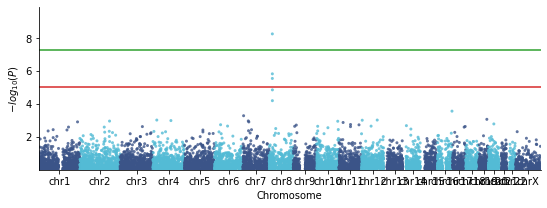

In [4]:
# Plot a basic manhattan plot with horizontal xtick labels and the figure will display in screen.
ax = manhattanplot(data=df)

The parameter of ``manhattanplot()`` defined the name of output figure file
and the format of the figure file depending on the file suffix, which could
be ".png", ".jpg", or ".pdf".

```python
ax = manhattanplot(data=df, 
                   is_show=False,  # Set False: No need to display the plot in Desktop screen, default: True
                   figname="output_manhattan_plot.png")
```

### Rotate the x-axis tick label by setting ``xticklabel_kws``

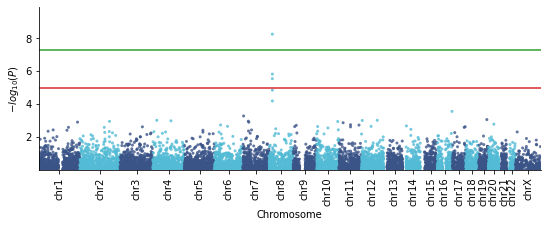

In [5]:
ax = manhattanplot(data=df, xticklabel_kws={"rotation": "vertical"})

### Or rotate the labels by other degrees:

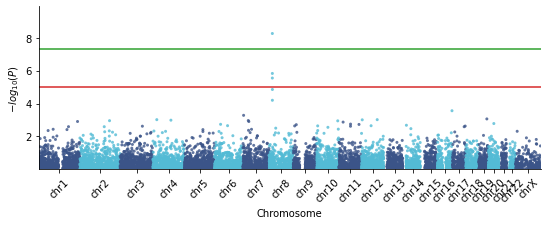

In [6]:
ax = manhattanplot(data=df, xticklabel_kws={"rotation": 45})


Change horizontal line style by ``hline_kws``:

In [ ]:
ax = manhattanplot(data=df, 
                   hline_kws={"linestyle": "--", "lw": 1.3},
                   xlabel="Chromosome",
                   ylabel=r"$-log_{10}{(P)}$",
                   xticklabel_kws={"rotation": "vertical"})

When run with default parameters, the ``manhattanplot()`` function draws
horizontal lines drawn at $-log_{10}{(1e-5)}$ for "suggestive" associations
and $-log_{10}{(5e-8)}$ for the "genome-wide significant" threshold. These
can be move to different locations or turned off completely with the arguments
``suggestiveline`` and ``genomewideline``, respectively.

In [ ]:
ax = manhattanplot(data=df,
                   suggestiveline=None,  # Turn off suggestiveline
                   genomewideline=None,  # Turn off genomewideline
                   xticklabel_kws={"rotation": "vertical"})

### specific a chromosome

The behavior of the ``manhattanplot`` function changes slightly when results
from only a single chromosome are used. Here, instead of plotting alternating
colors and chromosome ID on the x-axis, the SNP's position on the chromosome
is plotted on the x-axis:

In [ ]:
# plot only results on chromosome 8.
ax = manhattanplot(data=df, 
                   CHR="chr8",
                   hline_kws={"linestyle": "--", "lw": 1.3}, 
                   xlabel="Chromosome 8")

### Highlight SNPs with significant GWAS signal and annotate the Top SNP. 

Note: highlighting SNPs of interest can be combined with limiting to a
single chromosome to enable "zooming" into a particular region containing SNPs
of interest.

In [ ]:
ax = manhattanplot(data=df,
                   sign_marker_p=1e-6,  # highline the significant SNP with ``sign_marker_color`` color.
                   is_annotate_topsnp=True,  # annotate the top SNP
                   hline_kws={"linestyle": "--", "lw": 1.3},
                   xticklabel_kws={"rotation": "vertical"})

### Plot other value in manhattan style

Specific any other column data instead of ``P-value`` and plot in manhattan style by ``manhattanplot()``. Here's an example for plotting ``BETA`` value of PLINK2 GWAS result:

In [ ]:
ax = manhattanplot(data=df,
                   chrom="#CHROM",       # column name of chromosomal name
                   pos="POS",            # column name of chromosomal position
              
                   pv="BETA",            # The column name of BETA value.
                   logp=False,           # Turn off -log10 scale.
                   suggestiveline=None,  # Turn off suggestiveline
                   genomewideline=None,  # Turn off genomewideline
              
                   title="Plot beta value",
                   ylabel="BETA Value",  # set a new y axis label
                   xlabel="Chromosome",
                   xticklabel_kws={"rotation": "vertical"})


### Show a better manhattan plot

Futher graphical parameters can be passed to the ``manhattanplot()`` function
to control thing like plot title, point character, size, colors, etc. Here is
the example:

In [ ]:
# common parameters for plotting
plt_params = {
    "font.sans-serif": "Arial",
    "legend.fontsize": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}
plt.rcParams.update(plt_params)

# Create a manhattan plot
f, ax = plt.subplots(figsize=(12, 4), facecolor='w', edgecolor='k')
xtick = set(['chr' + i for i in list(map(str, range(1, 10))) + ['11', '13', '15', '18', '21', 'X']])
manhattanplot(data=df,
              marker=".",
              sign_marker_p=1e-6,  # Genome wide significant p-value
              sign_marker_color="r",
              snp="ID",  # The column name of annotation information for top SNPs.

              title="Test",
              xtick_label_set=xtick,
              
              xlabel="Chromosome",
              ylabel=r"$-log_{10}{(P)}$",

              sign_line_cols=["#D62728", "#2CA02C"],
              hline_kws={"linestyle": "--", "lw": 1.3},

              is_annotate_topsnp=True,
              ld_block_size=50000,  # 50000 bp
              text_kws={"fontsize": 12,
                        "arrowprops": dict(arrowstyle="-", color="k", alpha=0.6)},

              dpi=300,
#               figname="output_manhattan_plot.png",
              ax=ax)

## QQ plot with defualt parameters.

The ``qqplot()`` function can be used to generate a Q-Q plot to visualize the distribution of association "P-value".
The ``qqplot()`` function takes a vector of P-values as its the only required argument.

In [ ]:
ax = qqplot(data=df["P"])

### Show a better QQ plot

Futher graphical parameters can be passed to ``qqplot()`` to control the plot title, 
axis labels, point characters, colors, points sizes, etc. Here is the example:

In [ ]:
# Create a Q-Q plot
f, ax = plt.subplots(figsize=(6, 6), facecolor="w", edgecolor="k")
_ = qqplot(data=df["P"],
           marker="o",
           title="Test",
           xlabel=r"Expected $-log_{10}{(P)}$",
           ylabel=r"Observed $-log_{10}{(P)}$",
           dpi=300,
#            figname="output_QQ_plot.png",
           ax=ax)